# 图像基本操作

**数据读取-图像**
- cv2.IMREAD_COLOR:彩色图像
- cv2.INREAD_GRAYSCALE:灰度图像

In [3]:
import cv2 #opencv读取的格式是BGR
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
#%matplotlib inline是一个魔法函数（Magic Functions）。
#Python有一组预先定义好的所谓的魔法函数（Magic Functions），你可以通过命令行的语法形式来访问它们。
#使用%matplotlib命令可以将matplotlib的图表直接嵌入到Notebook之中，
#或者使用指定的界面库显示图表，它有一个参数指定matplotlib图表的显示方式。inline表示将图表嵌入到Notebook中。
img=cv2.imread('picture/Lena.jpg')

In [4]:
img #显示图像（用数组的形式）

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

In [5]:
#图像的显示，也可以创建多个窗口
cv2.imshow('image',img)
#等待时间，毫秒级，0表示任意键终止
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
#将上面步骤定义为一个函数
#name是打开的图像窗口名，img是图像
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [7]:
img.shape #[高h][宽w][通道数]

(512, 512, 3)

In [8]:
img=cv2.imread('picture/Lena.jpg',cv2.IMREAD_GRAYSCALE)
img

array([[169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       ...,
       [ 53,  53,  59, ..., 115, 112, 114],
       [ 53,  53,  64, ..., 117, 118, 122],
       [ 53,  53,  64, ..., 117, 118, 122]], dtype=uint8)

In [9]:
img.shape

(512, 512)

In [10]:
#图像的显示，也可以创建多个窗口
cv2.imshow('image',img)
#等待时间，毫秒级，0表示任意键终止
cv2.waitKey(10000)
cv2.destroyAllWindows()

In [11]:
#保存图片
cv2.imwrite('picture/myLena.png',img)

True

In [12]:
type(img)#图像的数据类型

numpy.ndarray

**数据读取-视频**
- cv2.VideoCapture可以捕获摄像头，用数字来控制不同的设备，例如0，1
- 如果是视频文件，直接指定好路径即可

In [13]:
vc=cv2.VideoCapture('video/video01.mp4')

In [14]:
# 检查是否打开正确
if vc.isOpened(): # vc能打开
    open,frame=vc.read() #函数有两个返回值，open表示读取是否成功，frame是读取的图像
else:
    open=False

In [15]:
while open:
    ret,frame=vc.read()
    if frame is None: # 读到的图为空
        break
    if ret==True:
        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)# 将图片转换为灰度图
        cv2.imshow('result',gray)# 显示转换后的灰度图
        if cv2.waitKey(100)&0xFF==27:# ESC键退出
            break
vc.release()#释放硬件资源
cv2.destroyAllWindows()#关闭所有窗口

**截取部分图像数据**

In [16]:
img=cv2.imread('picture/Lena.jpg')
Lena=img[0:200,0:200] # 截取img图像的左上角大小为200的区域
cv_show('Lena',Lena)

**颜色通道提取**

In [17]:
b,g,r=cv2.split(img) # 将三个颜色通道提取出来

In [18]:
b # 输出通道b（blue）

array([[125, 125, 133, ..., 122, 110,  90],
       [125, 125, 133, ..., 122, 110,  90],
       [125, 125, 133, ..., 122, 110,  90],
       ...,
       [ 60,  60,  58, ...,  84,  76,  79],
       [ 57,  57,  62, ...,  79,  81,  81],
       [ 57,  57,  62, ...,  79,  81,  81]], dtype=uint8)

In [19]:
b.shape # 输出通道b的高和宽

(512, 512)

In [20]:
g # 输出通道g（green）

array([[137, 137, 137, ..., 148, 130,  99],
       [137, 137, 137, ..., 148, 130,  99],
       [137, 137, 137, ..., 148, 130,  99],
       ...,
       [ 18,  18,  27, ...,  73,  68,  62],
       [ 22,  22,  32, ...,  70,  71,  74],
       [ 22,  22,  32, ...,  70,  71,  74]], dtype=uint8)

In [21]:
g.shape # 输出通道g的高和宽

(512, 512)

In [22]:
r # 输出通道r（red）

array([[226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       ...,
       [ 84,  84,  92, ..., 173, 172, 177],
       [ 82,  82,  96, ..., 179, 181, 185],
       [ 82,  82,  96, ..., 179, 181, 185]], dtype=uint8)

In [23]:
r.shape # 输出通道r的高和宽

(512, 512)

In [24]:
img=cv2.merge((b,g,r)) # 将三个颜色通道组合，形成一个RGB图像
img.shape

(512, 512, 3)

In [25]:
# 只保留R通道
cur_img=img.copy()
cur_img[:,:,0]=0
cur_img[:,:,1]=0
cv_show('R',cur_img) # 调用了之前定义的显示图像的函数

In [26]:
# 只保留G通道
cur_img=img.copy()
cur_img[:,:,0]=0
cur_img[:,:,2]=0
cv_show('G',cur_img) # 调用了之前定义的显示图像的函数

In [27]:
# 只保留B通道
cur_img=img.copy()
cur_img[:,:,1]=0
cur_img[:,:,2]=0
cv_show('B',cur_img) # 调用了之前定义的显示图像的函数

**边界填充**

In [28]:
img = cv2.imread('picture/Lena.jpg')  # 读图（BGR）
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 将BGR图转化为RGB，因为plt.imshow用的是RGB
top_size,bottom_size,left_size,right_size=(50,50,50,50)#上下左右填充大小均为50
# 复制边缘的像素点
replicate=cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REPLICATE)
# 反射，以图像边缘为轴对称,gfedcba|abcdefg|afedcba
refliect=cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_REFLECT)
# 反射，以最边缘像素为轴对称，gfedcb|abcdefg|fedcba
refliect101=cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_REFLECT_101)
# 外包装法，cdefg|abcdefgh|abcdefg
wrap=cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_WRAP)
# 常量法，常数值填充
constant=cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_CONSTANT,value=0)

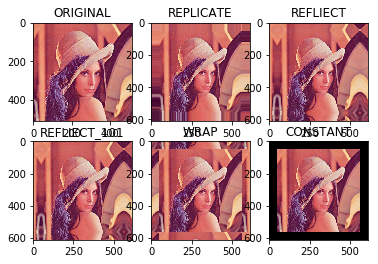

In [29]:
import matplotlib.pyplot as plt
#在一个图中显示上面的6张图
plt.subplot(231),plt.imshow(img),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate),plt.title('REPLICATE')
plt.subplot(233), plt.imshow(refliect), plt.title('REFLIECT')
plt.subplot(234), plt.imshow(refliect101), plt.title('REFLIECT_101')
plt.subplot(235), plt.imshow(wrap), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant), plt.title('CONSTANT')
plt.show()

**数值计算**

In [30]:
img_cat=cv2.imread('picture/cat.png')
img_dog=cv2.imread('picture/dog.png')

In [31]:
img_cat2 = img_cat+10  # img_cat中的所有值+10
img_cat[:5,:,0]

array([[206, 206, 207, ..., 204, 204, 204],
       [206, 206, 207, ..., 204, 204, 204],
       [207, 207, 207, ..., 204, 205, 205],
       [208, 208, 208, ..., 205, 206, 206],
       [208, 208, 208, ..., 205, 206, 206]], dtype=uint8)

In [32]:
img_cat2[:5,:,0]

array([[216, 216, 217, ..., 214, 214, 214],
       [216, 216, 217, ..., 214, 214, 214],
       [217, 217, 217, ..., 214, 215, 215],
       [218, 218, 218, ..., 215, 216, 216],
       [218, 218, 218, ..., 215, 216, 216]], dtype=uint8)

In [33]:
#相加越界，相当于%256
(img_cat+img_cat2)[:5,:,0]

array([[166, 166, 168, ..., 162, 162, 162],
       [166, 166, 168, ..., 162, 162, 162],
       [168, 168, 168, ..., 162, 164, 164],
       [170, 170, 170, ..., 164, 166, 166],
       [170, 170, 170, ..., 164, 166, 166]], dtype=uint8)

**图像融合**

In [34]:
#img_cat+img_dog#图像大小不同，报错

In [35]:
img_cat.shape#猫图像的大小，[高宽通道]

(517, 730, 3)

In [36]:
#将狗图像缩放到与猫相同
img_dog=cv2.resize(img_dog,(730,517))
img_dog.shape

(517, 730, 3)

In [37]:
res=cv2.addWeighted(img_cat,0.5,img_dog,0.5,0)#图像相加，权重，最后为偏置项
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)  # 将BGR图转化为RGB

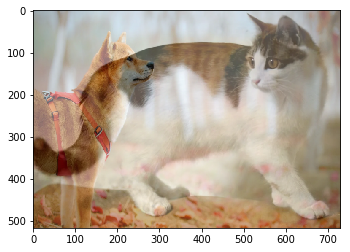

In [38]:
plt.imshow(res)#显示叠加后的图像

**图像阈值**
**ret,dst=cv2.threshold(src,thresh,maxval,type)**
- src：输入图，只能输入单通道图像，通常为灰度图
- dst：输出图
- thresh：阈值
- maxval：当像素超过了阈值（或者小于阈值，根据type来决定），所赋予的值
- type：二值化操作的类型，包含以下5种类型：
- cv2.THRESH_BINARY超过阈值的部分取maxval（最大值），否则取0
- cv2.THRESH_BINARY_INV cv2.THRESH_BINARY的反转
- cv2.THRESH_TRUNC大于阈值部分设为阈值，否则不变
- cv2.THRESH_TOZERO大于阈值的部分不改变，否则置为0
- cv2.THRESH_TOZERO_INV cv2.THRESH_TOZERO的反转

In [39]:
img = cv2.imread('picture/Lena.jpg')#读图
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 将图片转换为灰度图
cv2.imwrite('picture/mygray.jpg',img_gray)#存储灰度图

True

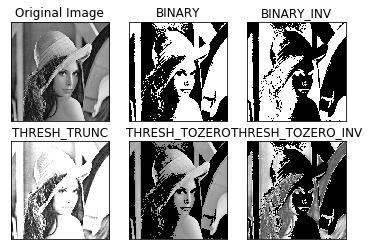

In [40]:
#5种阈值处理方式
ret,thresh1=cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
ret,thresh2=cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3=cv2.threshold(img_gray,127,255,cv2.THRESH_TRUNC)
ret,thresh4=cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO)
ret,thresh5=cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO_INV)
#图的标题
titles=['Original Image','BINARY','BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
#存图的变量
images=[img_gray,thresh1,thresh2,thresh3,thresh4,thresh5]
#输出6张图
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')#显示图
    plt.title(titles[i])#图标题
    plt.xticks([]),plt.yticks([])#图的x轴和y轴不显示信息
plt.show()#显示图

**图像平滑**